In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
url=('https://raw.githubusercontent.com/kabirnagpal/SoA-ML-14/master/data/Wine.csv')
df = pd.read_csv(url)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


read_csv for reading the file and head for displaying the top 5 rows

In [4]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

cloumns returns a list of all the column headings in the table 

In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


generate a descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution for the given series object. All the calculations are performed by excluding NaN values

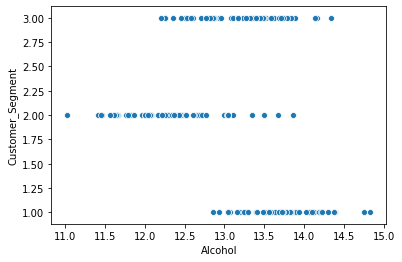

In [6]:
sns.scatterplot(df['Alcohol'],df['Customer_Segment'])

scatterplot plots a scaterplot between the given parameters

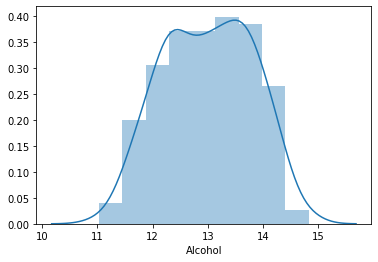

In [7]:
sns.distplot(df['Alcohol'])

distplot plots a superposition of 2 graphs, a histogram and a kernel density estimation plot

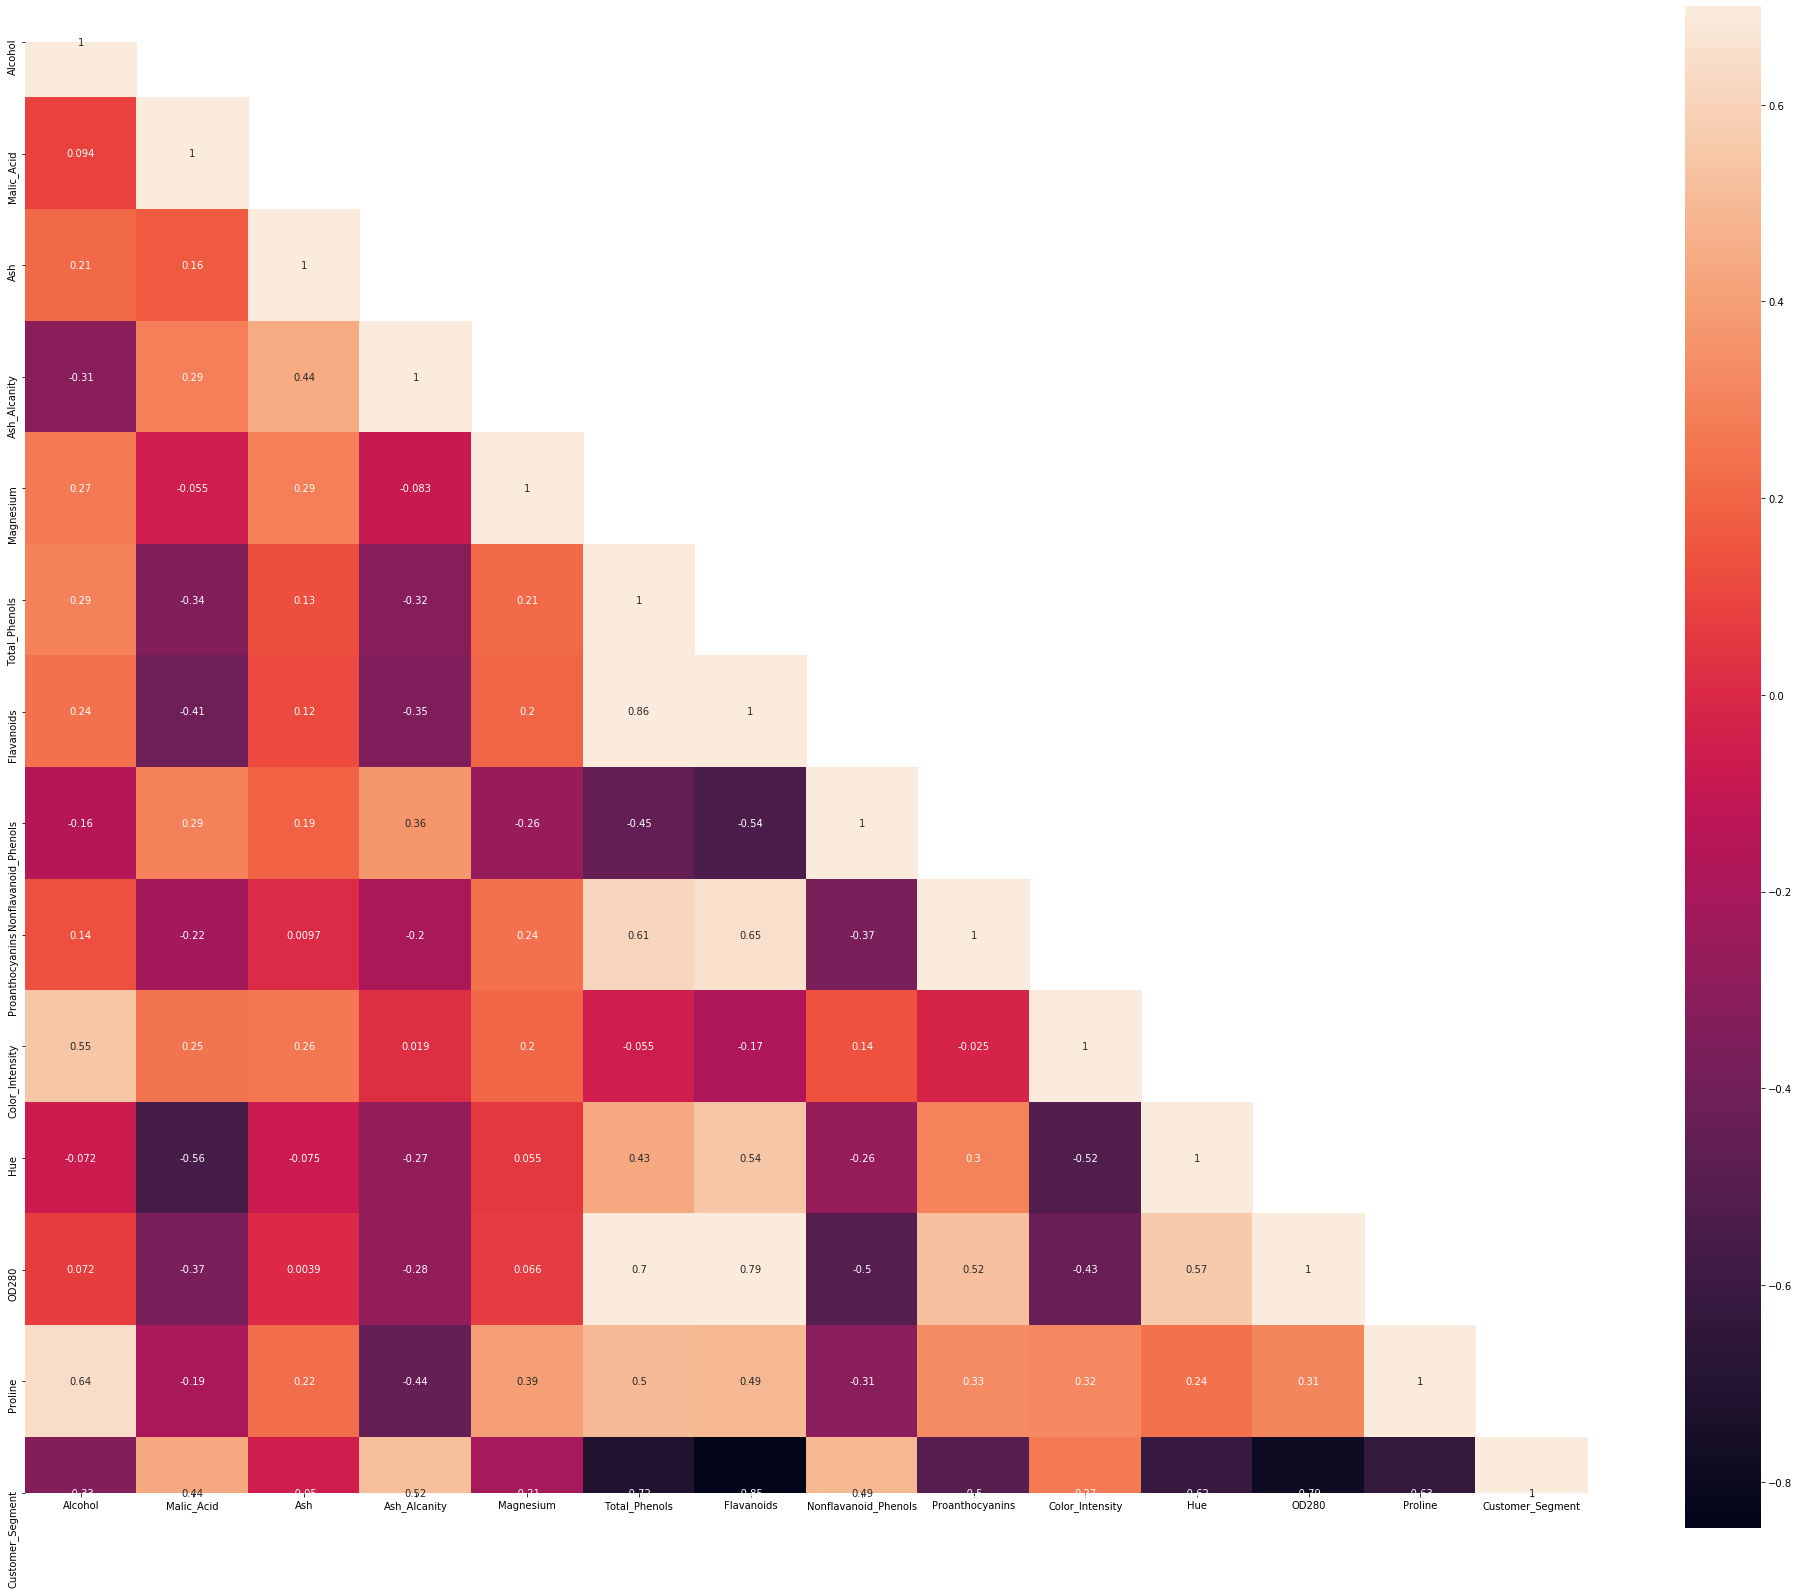

In [14]:
correlation_map = df[df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
#print(obj)
fig,ax= plt.subplots()
fig.set_size_inches(35,28)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)



corr function is used to find corelation between all the columns taken 2 at a time,all non numeric columns are ignored
array function is converting the corelation map to an array(here)
the tril indices from funtion returns the lower triangle .here its used to set the upper triangle of the obj to 0(false)
subplots makes a figure conatining different plots (def vaule 1 row and 1 column)(fig is figure layout and ax is array of axes)
set_size_inches sets the size of the plot as given width and height
heatmap creates a heatmap of the numerical 2d array given 
vmax limits the upper value of map
annot prints the value on the cell
square sets the shape of each cell as square 

!!!not sure about the mask parameter,maybe used to set heatmap in the subplot



In [15]:
train = df.drop(['Customer_Segment'],axis=1)
test=df['Customer_Segment']
y = df.iloc[:, -1].values

drop removes the customer segment column  from the data frame
and were using the dropped column to train our dataset so we make it another array
iloc function is used here to select all rows and the last column 

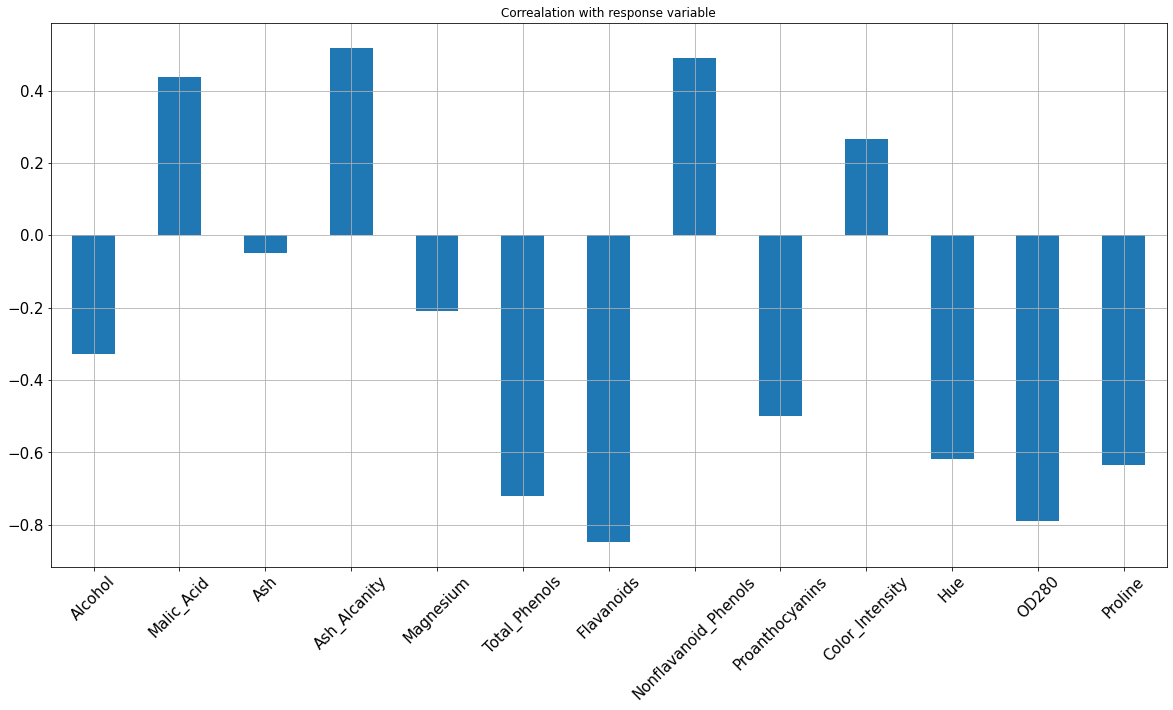

In [18]:
train.corrwith(test).plot.bar(figsize=(20,10),title="Correalation with response variable",fontsize=15,rot=45,grid=True)

train is the dataframe without customer_segment and is being used for corelation analysis with test(customer_segment)
and we're plotting it as a bargraph

